In [2]:
import import_ipynb
from seir_model import *

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from scipy.optimize import minimize
from time import time
from datetime import datetime

importing Jupyter notebook from seir_model.ipynb


gamma (tikhonov): 0.0
best_pe: 0.211
best_pi: 0.0
best_exposition_ratio: 1.878
min_J: 0.102
runtime: 0.871


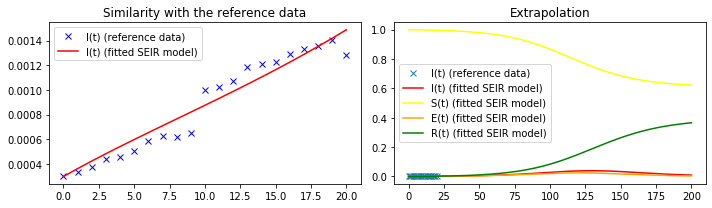

Duration before the peak: 129
Cumulative number of infected people after the peak: 36.6%
gamma (tikhonov): 5.0
best_pe: 0.16
best_pi: 0.0
best_exposition_ratio: 2.849
min_J: 0.239
runtime: 1.451


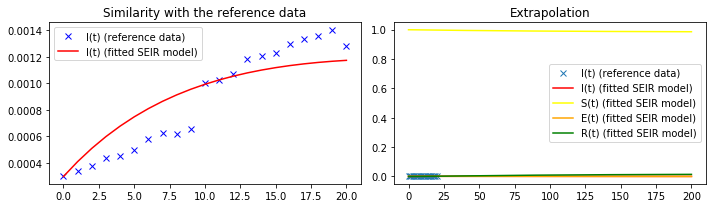

Duration before the peak: 25
Cumulative number of infected people after the peak: 1.4%
gamma (tikhonov): 10.0
best_pe: 0.154
best_pi: 0.0
best_exposition_ratio: 2.953
min_J: 0.287
runtime: 2.33


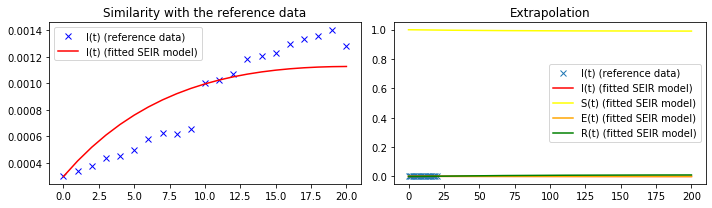

Duration before the peak: 20
Cumulative number of infected people after the peak: 1.0%


In [5]:
# French data from 03/25/2020 onwards
    
if __name__ == '__main__':
    
    country_pop = 6.7E+7
    start_date = datetime(2020, 3, 25)

    df = pd.read_csv('covid_19_aggregation.csv')
    df = df[df['Country_Region']=='France']
    df = df[(df['Province_State']=='France')|(df['Province_State'].isnull())]
    df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])
    df = df[df['ObservationDate']>=start_date]
    df['R'] = (df['Deaths'] + df['Recovered']) / country_pop
    df['I'] = df['Confirmed'] / country_pop - df['R']

    I_ref, R_ref = df['I'].values, df['R'].values
    
    # Extrapolation window
    T = 200

    # Bounds for parameters we need to fit
    pe_bounds = (1E-10, 10)
    pi_bounds = (1E-10, 10)
    exposition_ratio_bounds = (1, 100)

    bounds = [pe_bounds, pi_bounds, exposition_ratio_bounds]

    n_iter = 25

    gamma_grid = np.linspace(0, 10, 3)

    fitted_model = fit_seir_model(I_ref, T, bounds, n_iter, gamma_grid)
    
    for gamma in fitted_model:
        
        best_results = fitted_model[gamma]
        
        if 'success' not in best_results or best_results['success'] == False:
            best_results = random_sample_minimize(J, bounds, extra_parameters, n_iter=n_iter+20, local_method='SLSQP')

        if 'success' not in best_results or best_results['success'] == False:
            print('No minimum found')
            print(best_results)

        else:
            
            print('gamma (tikhonov): {}'.format(gamma))

            print('best_pe: {}'.format(round(best_results['x'][0], 3)))
            print('best_pi: {}'.format(round(best_results['x'][1], 3)))
            print('best_exposition_ratio: {}'.format(round(best_results['x'][2], 3)))
            print('min_J: {}'.format(round(best_results['fun'], 3)))
            print('runtime: {}'.format(round(best_results['runtime'], 3)))

            best_pe, best_pi, best_exposition_ratio = best_results['x'][0], best_results['x'][1], best_results['x'][2]

            # Fitted model
            S_list, E_list, I_list, R_list = SEIR(best_exposition_ratio*I_ref[0], I_ref[0], best_pe, best_pi, 6, 10, T)

            # Plot results
            plot_results(I_ref, S_list, E_list, I_list, R_list)

            print("Duration before the peak: {}".format(peak(I_list)))
            print("Cumulative number of infected people after the peak: {}%".format(round(100*R_list[-1], 1)))
        
        print('=====================================================================')

gamma (tikhonov): 0.0
best_pe: 0.176
best_pi: 0.0
best_exposition_ratio: 1.088
min_J: 0.008
runtime: 3.401


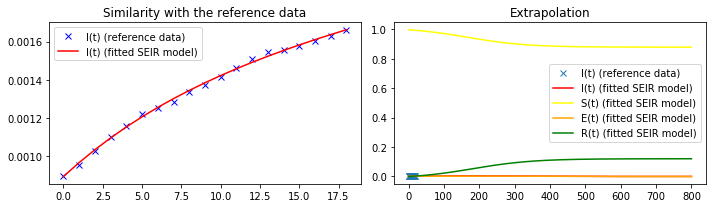

Duration before the peak: 181
Cumulative number of infected people after the peak: 12.1%
gamma (tikhonov): 0.47619047619047616
best_pe: 0.171
best_pi: 0.0
best_exposition_ratio: 1.13
min_J: 0.03
runtime: 8.054


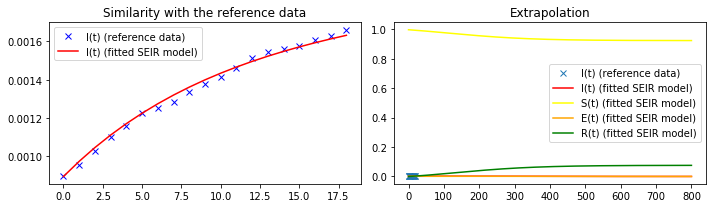

Duration before the peak: 130
Cumulative number of infected people after the peak: 7.5%
gamma (tikhonov): 0.9523809523809523
best_pe: 0.167
best_pi: 0.0
best_exposition_ratio: 1.164
min_J: 0.043
runtime: 2.163


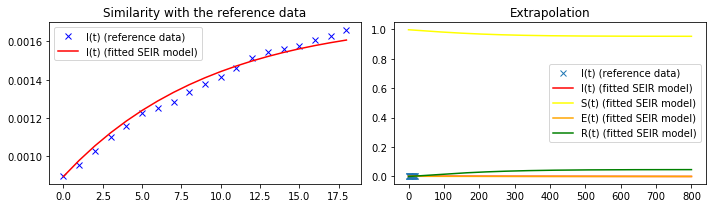

Duration before the peak: 39
Cumulative number of infected people after the peak: 4.7%
gamma (tikhonov): 1.4285714285714284
best_pe: 0.165
best_pi: 0.0
best_exposition_ratio: 1.183
min_J: 0.053
runtime: 6.245


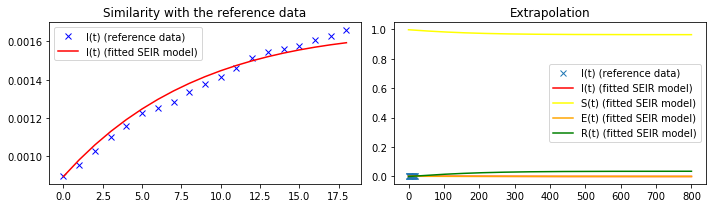

Duration before the peak: 29
Cumulative number of infected people after the peak: 3.5%
gamma (tikhonov): 1.9047619047619047
best_pe: 0.163
best_pi: 0.0
best_exposition_ratio: 1.197
min_J: 0.062
runtime: 9.023


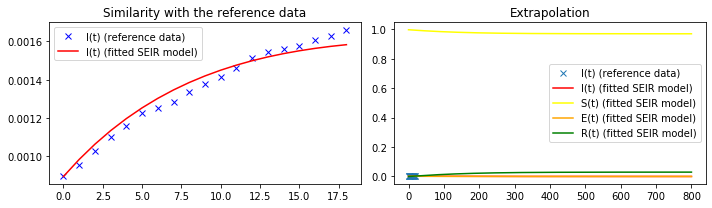

Duration before the peak: 25
Cumulative number of infected people after the peak: 2.9%
gamma (tikhonov): 2.380952380952381
best_pe: 0.162
best_pi: 0.0
best_exposition_ratio: 1.208
min_J: 0.07
runtime: 7.56


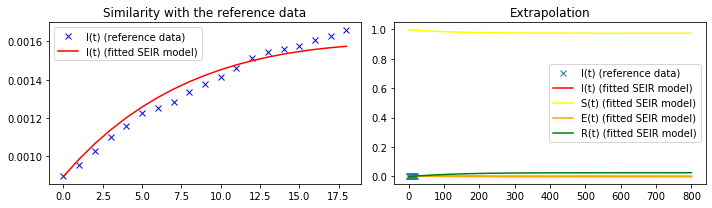

Duration before the peak: 23
Cumulative number of infected people after the peak: 2.6%
gamma (tikhonov): 2.8571428571428568
best_pe: 0.16
best_pi: 0.0
best_exposition_ratio: 1.218
min_J: 0.077
runtime: 4.745


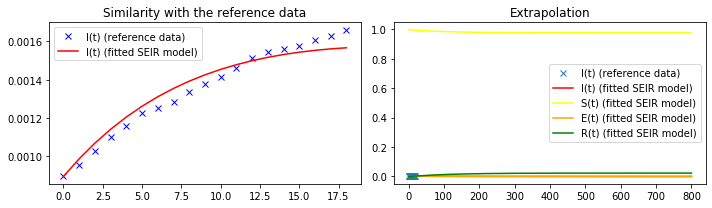

Duration before the peak: 21
Cumulative number of infected people after the peak: 2.3%
gamma (tikhonov): 3.333333333333333
best_pe: 0.159
best_pi: 0.0
best_exposition_ratio: 1.226
min_J: 0.084
runtime: 10.77


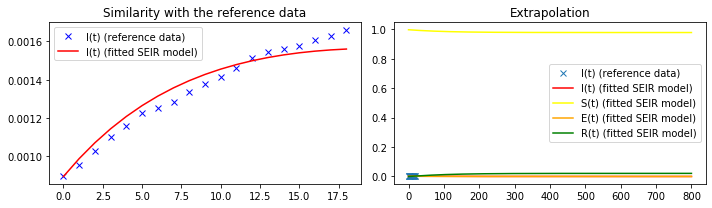

Duration before the peak: 20
Cumulative number of infected people after the peak: 2.1%
gamma (tikhonov): 3.8095238095238093
best_pe: 0.158
best_pi: 0.0
best_exposition_ratio: 1.234
min_J: 0.09
runtime: 9.657


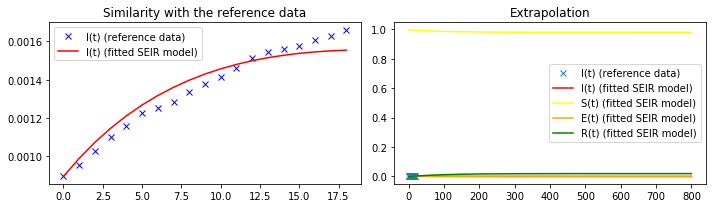

Duration before the peak: 20
Cumulative number of infected people after the peak: 1.9%
gamma (tikhonov): 4.285714285714286
best_pe: 0.158
best_pi: 0.0
best_exposition_ratio: 1.241
min_J: 0.097
runtime: 3.361


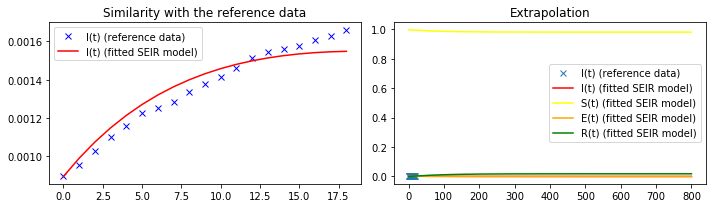

Duration before the peak: 19
Cumulative number of infected people after the peak: 1.8%
gamma (tikhonov): 4.761904761904762
best_pe: 0.157
best_pi: 0.0
best_exposition_ratio: 1.247
min_J: 0.103
runtime: 3.001


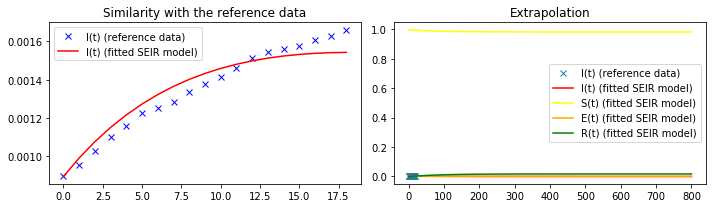

Duration before the peak: 18
Cumulative number of infected people after the peak: 1.7%
gamma (tikhonov): 5.238095238095238
best_pe: 0.156
best_pi: 0.0
best_exposition_ratio: 1.254
min_J: 0.109
runtime: 2.762


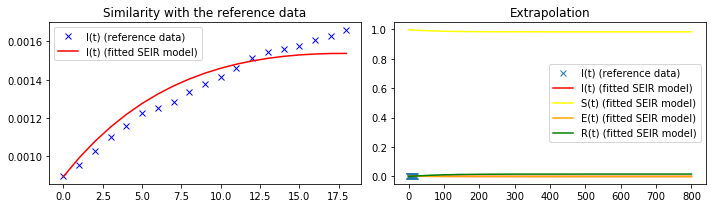

Duration before the peak: 18
Cumulative number of infected people after the peak: 1.6%
gamma (tikhonov): 5.7142857142857135
best_pe: 0.155
best_pi: 0.0
best_exposition_ratio: 1.26
min_J: 0.115
runtime: 1.017


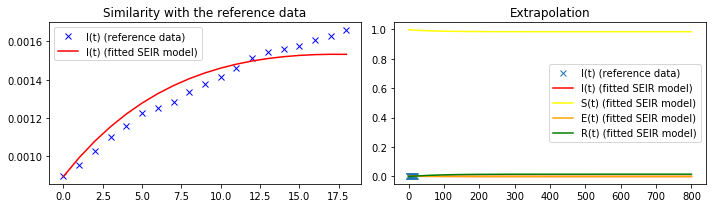

Duration before the peak: 17
Cumulative number of infected people after the peak: 1.6%
gamma (tikhonov): 6.19047619047619
best_pe: 0.154
best_pi: 0.0
best_exposition_ratio: 1.266
min_J: 0.12
runtime: 2.292


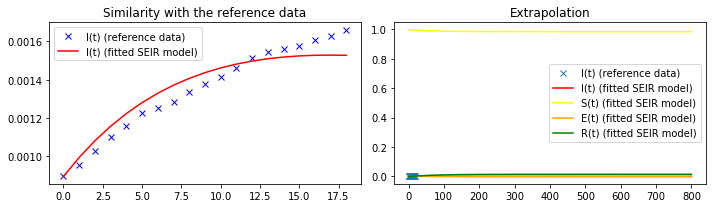

Duration before the peak: 17
Cumulative number of infected people after the peak: 1.5%
gamma (tikhonov): 6.666666666666666
best_pe: 0.154
best_pi: 0.0
best_exposition_ratio: 1.271
min_J: 0.126
runtime: 3.196


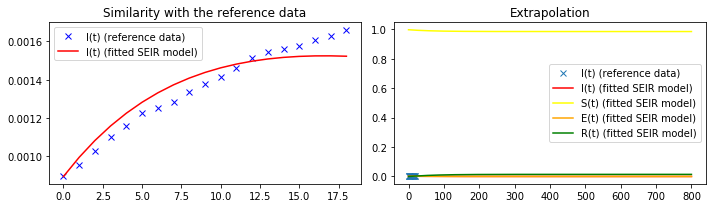

Duration before the peak: 17
Cumulative number of infected people after the peak: 1.4%
gamma (tikhonov): 7.142857142857142
best_pe: 0.153
best_pi: 0.0
best_exposition_ratio: 1.276
min_J: 0.131
runtime: 2.353


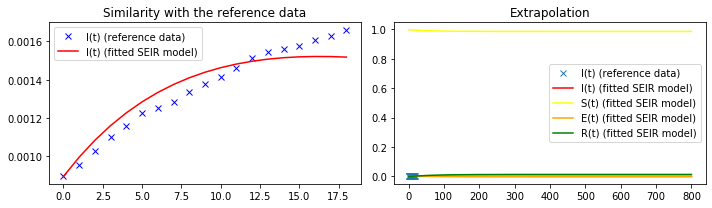

Duration before the peak: 16
Cumulative number of infected people after the peak: 1.4%
gamma (tikhonov): 7.619047619047619
best_pe: 0.152
best_pi: 0.0
best_exposition_ratio: 1.281
min_J: 0.137
runtime: 4.198


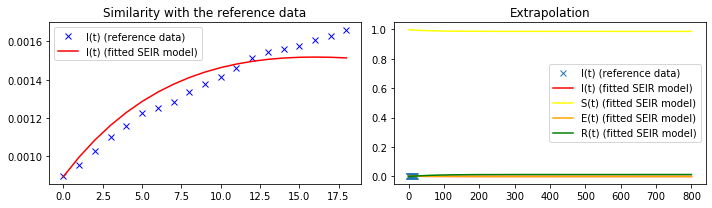

Duration before the peak: 16
Cumulative number of infected people after the peak: 1.3%
gamma (tikhonov): 8.095238095238095
best_pe: 0.152
best_pi: 0.0
best_exposition_ratio: 1.287
min_J: 0.142
runtime: 1.422


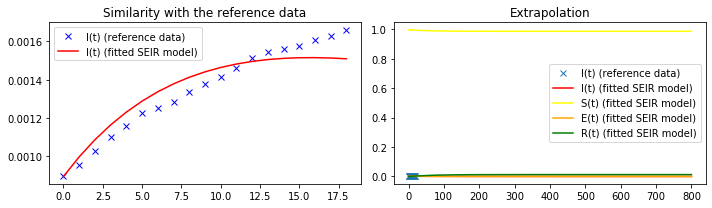

Duration before the peak: 16
Cumulative number of infected people after the peak: 1.3%
gamma (tikhonov): 8.571428571428571
best_pe: 0.151
best_pi: 0.0
best_exposition_ratio: 1.291
min_J: 0.147
runtime: 5.609


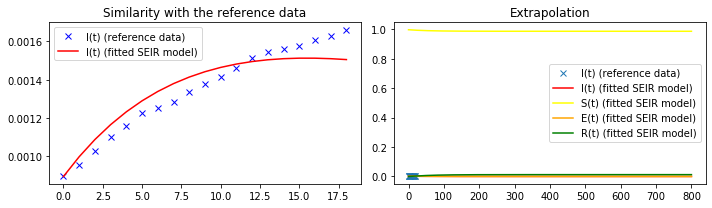

Duration before the peak: 15
Cumulative number of infected people after the peak: 1.2%
gamma (tikhonov): 9.047619047619047
best_pe: 2.122
best_pi: 6.234
best_exposition_ratio: 3.799
min_J: 176.792
runtime: 2.195


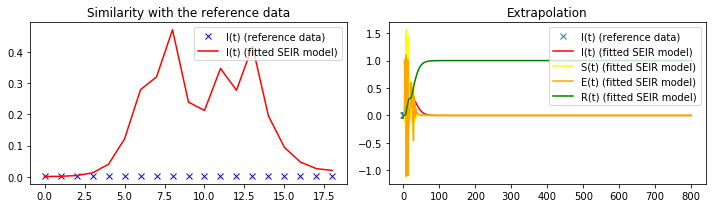

Duration before the peak: 8
Cumulative number of infected people after the peak: 100.0%
gamma (tikhonov): 9.523809523809524
best_pe: 0.15
best_pi: 0.0
best_exposition_ratio: 1.3
min_J: 0.157
runtime: 3.679


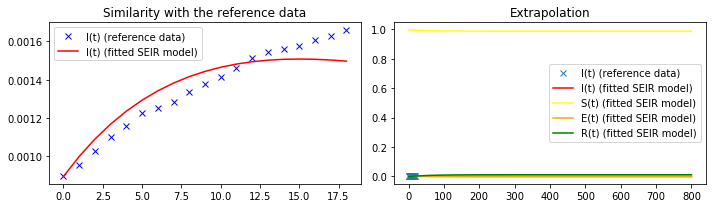

Duration before the peak: 15
Cumulative number of infected people after the peak: 1.2%
gamma (tikhonov): 10.0
best_pe: 0.149
best_pi: 0.0
best_exposition_ratio: 1.305
min_J: 0.162
runtime: 2.165


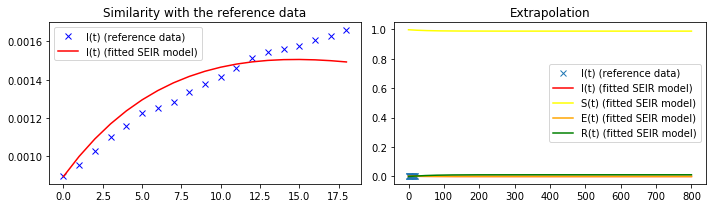

Duration before the peak: 15
Cumulative number of infected people after the peak: 1.2%


In [3]:
# Italian data from 03/24/2020

country_pop = 6.036E+7
start_date = datetime(2020, 3, 24)

df = pd.read_csv('covid_19_aggregation.csv')
df = df[df['Country_Region']=='Italy']
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])
df = df[df['ObservationDate']>=start_date]
df['R'] = (df['Deaths'] + df['Recovered']) / country_pop
df['I'] = df['Confirmed'] / country_pop - df['R']

I_ref, R_ref = df['I'].values, df['R'].values

# Extrapolation window
T = 800

# Bounds for parameters we need to fit
pe_bounds = (1E-10, 10)
pi_bounds = (1E-10, 10)
exposition_ratio_bounds = (1, 100)

bounds = [pe_bounds, pi_bounds, exposition_ratio_bounds]

n_iter = 25

gamma_grid = np.linspace(0, 10, 22)

fitted_model = fit_seir_model(I_ref, T, bounds, n_iter, gamma_grid)

for gamma in fitted_model:

    best_results = fitted_model[gamma]

    if 'success' not in best_results or best_results['success'] == False:
        best_results = random_sample_minimize(J, bounds, extra_parameters, n_iter=n_iter+20, local_method='SLSQP')

    if 'success' not in best_results or best_results['success'] == False:
        print('No minimum found')
        print(best_results)
        
    else:

        print('gamma (tikhonov): {}'.format(gamma))

        print('best_pe: {}'.format(round(best_results['x'][0], 3)))
        print('best_pi: {}'.format(round(best_results['x'][1], 3)))
        print('best_exposition_ratio: {}'.format(round(best_results['x'][2], 3)))
        print('min_J: {}'.format(round(best_results['fun'], 3)))
        print('runtime: {}'.format(round(best_results['runtime'], 3)))

        best_pe, best_pi, best_exposition_ratio = best_results['x'][0], best_results['x'][1], best_results['x'][2]

        # Fitted model
        S_list, E_list, I_list, R_list = SEIR(best_exposition_ratio*I_ref[0], I_ref[0], best_pe, best_pi, 6, 10, T)

        # Plot results
        plot_results(I_ref, S_list, E_list, I_list, R_list)

        print("Duration before the peak: {}".format(peak(I_list)))
        print("Cumulative number of infected people after the peak: {}%".format(round(100*R_list[-1], 1)))

    print('=====================================================================')

gamma (tikhonov): 0.0
best_pe: 0.111
best_pi: 0.002
best_exposition_ratio: 2.011
min_J: 0.05
runtime: 8.33


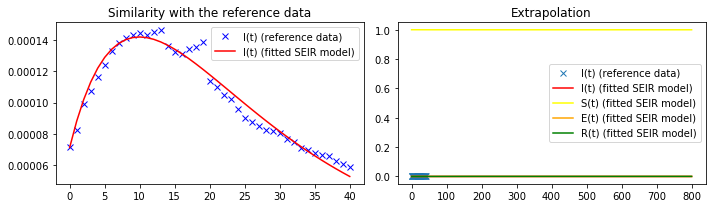

Duration before the peak: 10
Cumulative number of infected people after the peak: 0.1%
gamma (tikhonov): 0.47619047619047616
best_pe: 0.111
best_pi: 0.002
best_exposition_ratio: 2.011
min_J: 0.05
runtime: 2.647


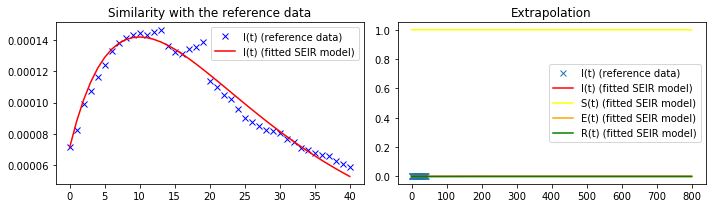

Duration before the peak: 10
Cumulative number of infected people after the peak: 0.1%
gamma (tikhonov): 0.9523809523809523
best_pe: 0.111
best_pi: 0.002
best_exposition_ratio: 2.011
min_J: 0.051
runtime: 12.715


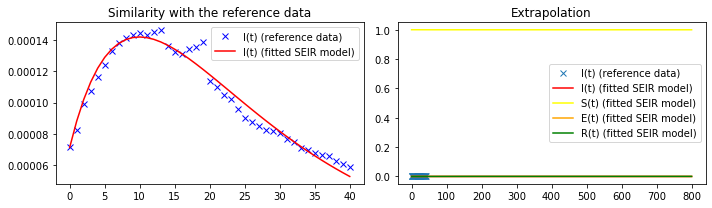

Duration before the peak: 10
Cumulative number of infected people after the peak: 0.1%
gamma (tikhonov): 1.4285714285714284
best_pe: 0.111
best_pi: 0.002
best_exposition_ratio: 2.011
min_J: 0.051
runtime: 6.303


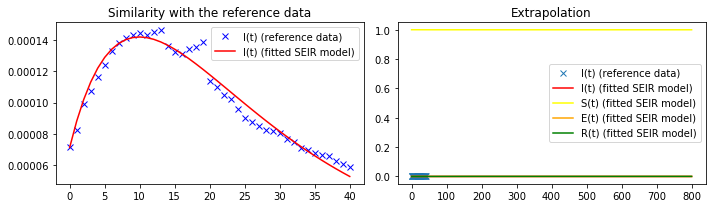

Duration before the peak: 10
Cumulative number of infected people after the peak: 0.1%
gamma (tikhonov): 1.9047619047619047
best_pe: 0.111
best_pi: 0.002
best_exposition_ratio: 2.01
min_J: 0.051
runtime: 4.006


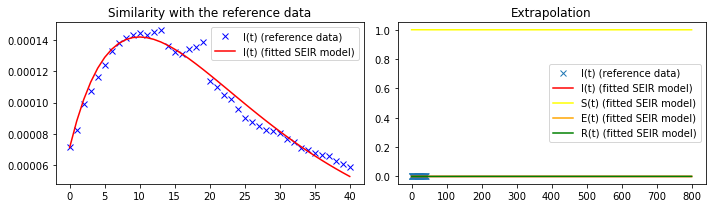

Duration before the peak: 10
Cumulative number of infected people after the peak: 0.1%
gamma (tikhonov): 2.380952380952381
best_pe: 0.111
best_pi: 0.002
best_exposition_ratio: 2.01
min_J: 0.052
runtime: 2.721


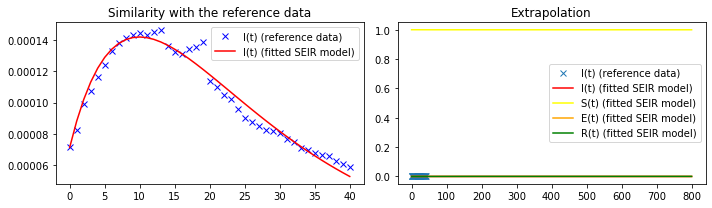

Duration before the peak: 10
Cumulative number of infected people after the peak: 0.1%
gamma (tikhonov): 2.8571428571428568
best_pe: 0.111
best_pi: 0.002
best_exposition_ratio: 2.01
min_J: 0.052
runtime: 2.086


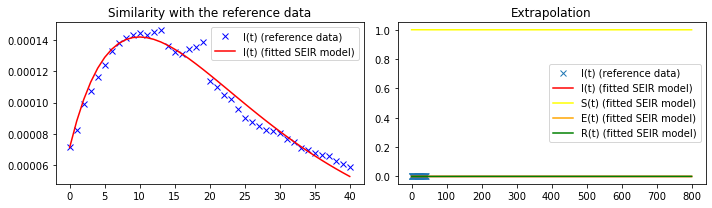

Duration before the peak: 10
Cumulative number of infected people after the peak: 0.1%
gamma (tikhonov): 3.333333333333333
best_pe: 0.111
best_pi: 0.002
best_exposition_ratio: 2.01
min_J: 0.052
runtime: 5.006


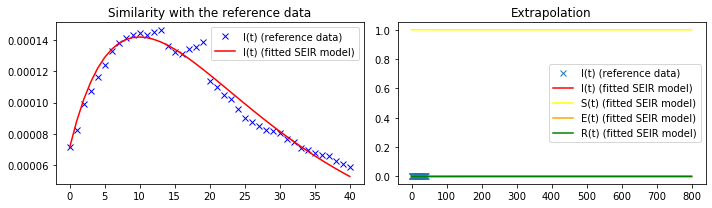

Duration before the peak: 10
Cumulative number of infected people after the peak: 0.1%
gamma (tikhonov): 3.8095238095238093
best_pe: 0.111
best_pi: 0.002
best_exposition_ratio: 2.01
min_J: 0.053
runtime: 7.304


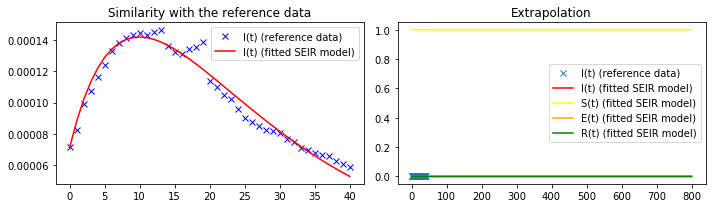

Duration before the peak: 10
Cumulative number of infected people after the peak: 0.1%
gamma (tikhonov): 4.285714285714286
best_pe: 0.111
best_pi: 0.002
best_exposition_ratio: 2.01
min_J: 0.053
runtime: 8.172


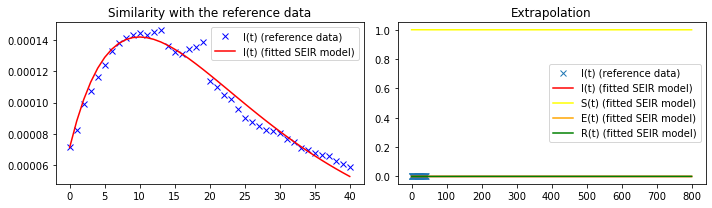

Duration before the peak: 10
Cumulative number of infected people after the peak: 0.1%
gamma (tikhonov): 4.761904761904762
best_pe: 0.111
best_pi: 0.002
best_exposition_ratio: 2.01
min_J: 0.053
runtime: 13.571


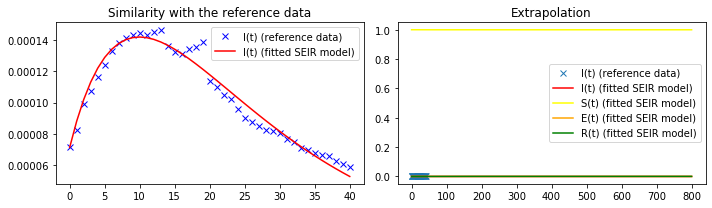

Duration before the peak: 10
Cumulative number of infected people after the peak: 0.1%
gamma (tikhonov): 5.238095238095238
best_pe: 0.111
best_pi: 0.002
best_exposition_ratio: 2.01
min_J: 0.054
runtime: 7.959


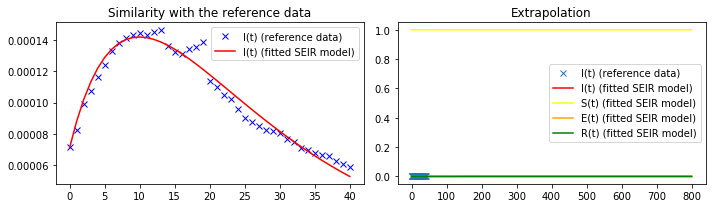

Duration before the peak: 10
Cumulative number of infected people after the peak: 0.1%
gamma (tikhonov): 5.7142857142857135
best_pe: 0.111
best_pi: 0.002
best_exposition_ratio: 2.01
min_J: 0.054
runtime: 2.494


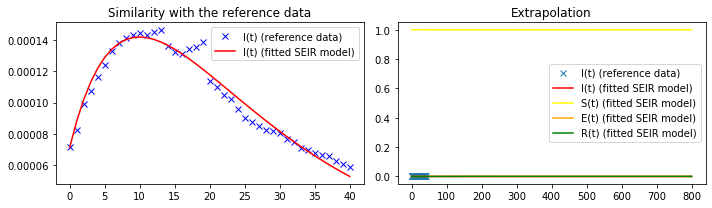

Duration before the peak: 10
Cumulative number of infected people after the peak: 0.1%
gamma (tikhonov): 6.19047619047619
best_pe: 0.111
best_pi: 0.002
best_exposition_ratio: 2.01
min_J: 0.054
runtime: 4.611


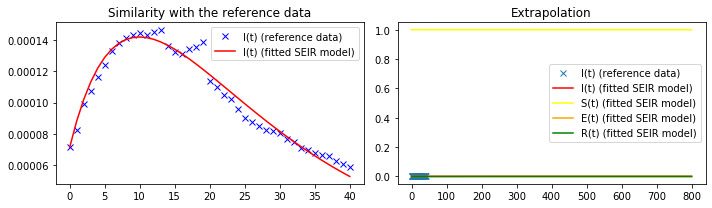

Duration before the peak: 10
Cumulative number of infected people after the peak: 0.1%
gamma (tikhonov): 6.666666666666666
best_pe: 0.111
best_pi: 0.002
best_exposition_ratio: 2.009
min_J: 0.055
runtime: 2.756


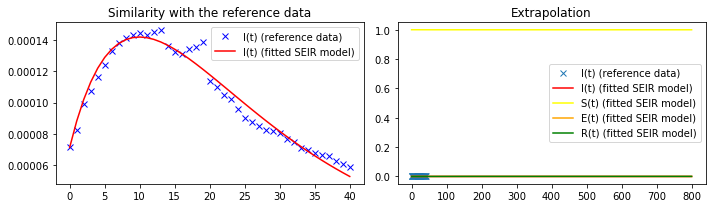

Duration before the peak: 10
Cumulative number of infected people after the peak: 0.1%
gamma (tikhonov): 7.142857142857142
best_pe: 0.111
best_pi: 0.002
best_exposition_ratio: 2.01
min_J: 0.055
runtime: 2.027


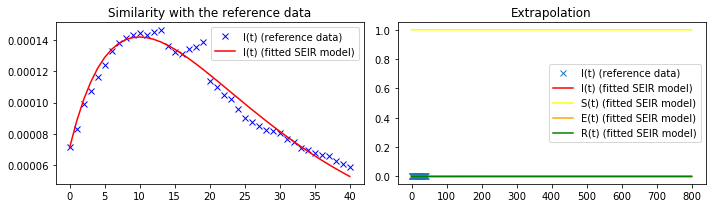

Duration before the peak: 10
Cumulative number of infected people after the peak: 0.1%
gamma (tikhonov): 7.619047619047619
best_pe: 0.111
best_pi: 0.002
best_exposition_ratio: 2.009
min_J: 0.055
runtime: 3.327


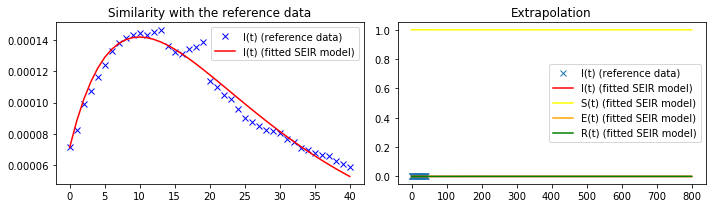

Duration before the peak: 10
Cumulative number of infected people after the peak: 0.1%
gamma (tikhonov): 8.095238095238095
best_pe: 0.111
best_pi: 0.002
best_exposition_ratio: 2.008
min_J: 0.056
runtime: 3.84


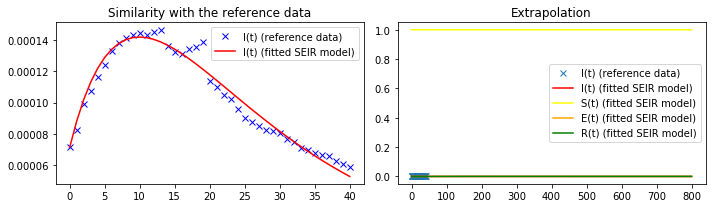

Duration before the peak: 10
Cumulative number of infected people after the peak: 0.1%
gamma (tikhonov): 8.571428571428571
best_pe: 0.111
best_pi: 0.002
best_exposition_ratio: 2.01
min_J: 0.056
runtime: 4.148


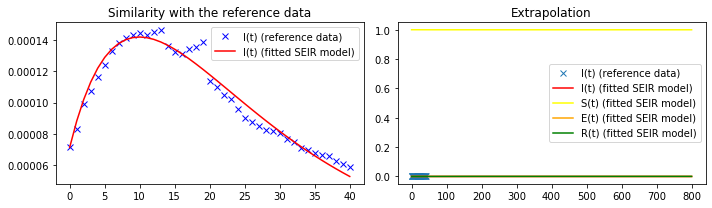

Duration before the peak: 10
Cumulative number of infected people after the peak: 0.1%
gamma (tikhonov): 9.047619047619047
best_pe: 0.111
best_pi: 0.002
best_exposition_ratio: 2.009
min_J: 0.056
runtime: 1.816


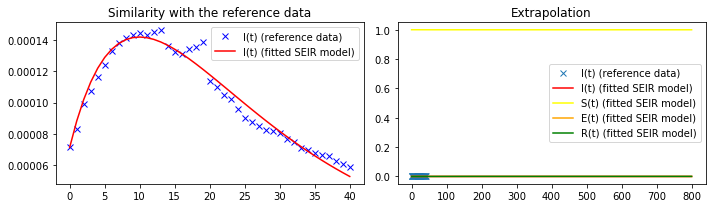

Duration before the peak: 10
Cumulative number of infected people after the peak: 0.1%
gamma (tikhonov): 9.523809523809524
best_pe: 2.108
best_pi: 6.215
best_exposition_ratio: 77.575
min_J: 1994.086
runtime: 3.453


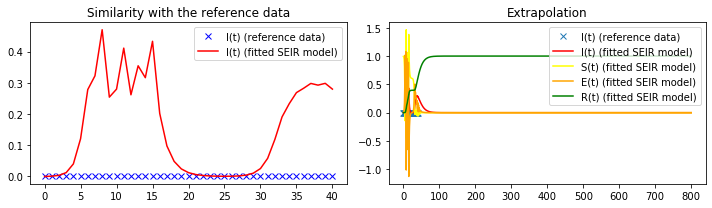

Duration before the peak: 8
Cumulative number of infected people after the peak: 100.0%
gamma (tikhonov): 10.0
best_pe: 1.313
best_pi: 5.037
best_exposition_ratio: 23.779
min_J: 2222.996
runtime: 2.082


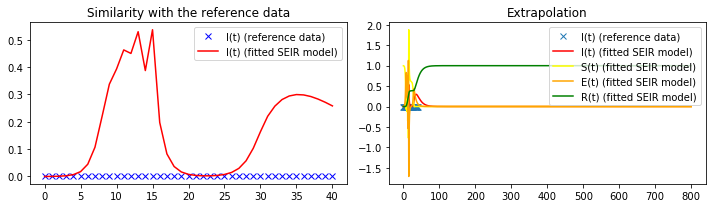

Duration before the peak: 11
Cumulative number of infected people after the peak: 100.0%


In [4]:
# South Korea data from 03/01/2020

country_pop = 5.17E+7
start_date = datetime(2020, 3, 1)

df = pd.read_csv('covid_19_aggregation.csv')
df = df[(df['Country_Region']=='Korea, South')|(df['Country_Region']=='South Korea')]
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])
df = df[df['ObservationDate']>=start_date]
df['R'] = (df['Deaths'] + df['Recovered']) / country_pop
df['I'] = df['Confirmed'] / country_pop - df['R']

I_ref, R_ref = df['I'].values, df['R'].values

# Extrapolation window
T = 800

# Bounds for parameters we need to fit
pe_bounds = (1E-10, 10)
pi_bounds = (1E-10, 10)
exposition_ratio_bounds = (1, 100)

bounds = [pe_bounds, pi_bounds, exposition_ratio_bounds]

n_iter = 25

gamma_grid = np.linspace(0, 10, 22)

fitted_model = fit_seir_model(I_ref, T, bounds, n_iter, gamma_grid)

for gamma in fitted_model:

    best_results = fitted_model[gamma]

    if 'success' not in best_results or best_results['success'] == False:
        best_results = random_sample_minimize(J, bounds, extra_parameters, n_iter=n_iter+20, local_method='SLSQP')

    if 'success' not in best_results or best_results['success'] == False:
        print('No minimum found')
        print(best_results)

    else:

        print('gamma (tikhonov): {}'.format(gamma))

        print('best_pe: {}'.format(round(best_results['x'][0], 3)))
        print('best_pi: {}'.format(round(best_results['x'][1], 3)))
        print('best_exposition_ratio: {}'.format(round(best_results['x'][2], 3)))
        print('min_J: {}'.format(round(best_results['fun'], 3)))
        print('runtime: {}'.format(round(best_results['runtime'], 3)))

        best_pe, best_pi, best_exposition_ratio = best_results['x'][0], best_results['x'][1], best_results['x'][2]

        # Fitted model
        S_list, E_list, I_list, R_list = SEIR(best_exposition_ratio*I_ref[0], I_ref[0], best_pe, best_pi, 6, 10, T)

        # Plot results
        plot_results(I_ref, S_list, E_list, I_list, R_list)

        print("Duration before the peak: {}".format(peak(I_list)))
        print("Cumulative number of infected people after the peak: {}%".format(round(100*R_list[-1], 1)))

    print('=====================================================================')

- Louis : 0650715437
- Validation/test